In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(
    # "../data/SG-ES.csv", 
    "../../../Downloads/SG-MG.csv", 
    parse_dates=["dataNotificacao", "dataEncerramento"], 
    encoding="utf-8", 
    sep=";"
)

df

ParserError: Error tokenizing data. C error: Expected 64 fields in line 135482, saw 65


In [ ]:

date_range = pd.date_range(
    # start=df['dataInicioSintomas'].min(), Notificação ou início dos sintomas?
    start=df['dataNotificacao'].min(),
    end=df['dataEncerramento'].max(),
    freq='D'
)

sir = pd.DataFrame(
    index=date_range, 
    columns=['I', 'R'], 
    dtype='int'
)

In [ ]:
df[df["dataEncerramento"].isnull()].shape[0]

210670

In [ ]:
# df = df.dropna(axis=0, subset=['dataEncerramento'])

In [ ]:
pd.set_option('future.no_silent_downcasting', True)
sir = sir.fillna(0)

for i, row in df.iterrows():
    
    start = row['dataNotificacao']
    end = start + pd.Timedelta(days=7)
    # end = row['dataEncerramento']
    
    if pd.isna(end):  
        sir.loc[start:, 'I'] += 1
    else: 
        assert start <= end, f"Inconsistency at row {i}, start={start}, end={end}"
        sir.loc[start:end - pd.Timedelta(days=1), 'I'] += 1
        sir.loc[end:, 'R'] += 1


In [ ]:
sir

,I,R
2020-01-09,4.0,0.0
2020-01-10,4.0,0.0
2020-01-11,4.0,0.0
2020-01-12,5.0,0.0
2020-01-13,5.0,0.0
...,...,...
2025-09-04,0.0,325855.0
2025-09-05,0.0,325855.0
2025-09-06,0.0,325855.0
2025-09-07,0.0,325855.0


In [ ]:
sir.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2020-01-09 to 2025-09-08
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       2070 non-null   float64
 1   R       2070 non-null   float64
dtypes: float64(2)
memory usage: 113.1 KB


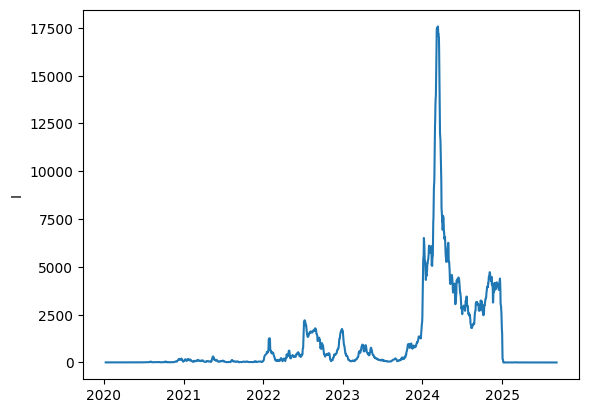

In [ ]:
sns.lineplot(data=sir["I"])
plt.show()

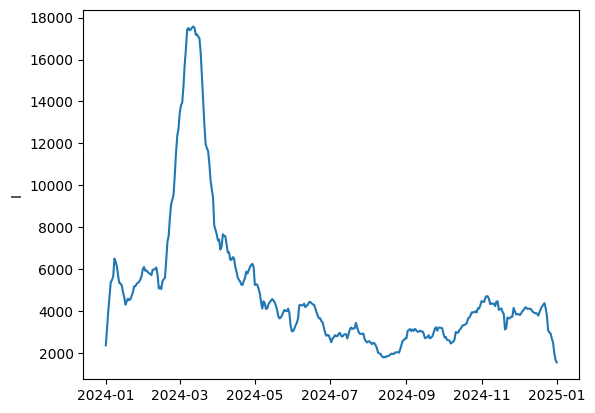

In [ ]:
sns.lineplot(data=sir["I"]["2024-01-01":"2025-01-01"])
plt.show()

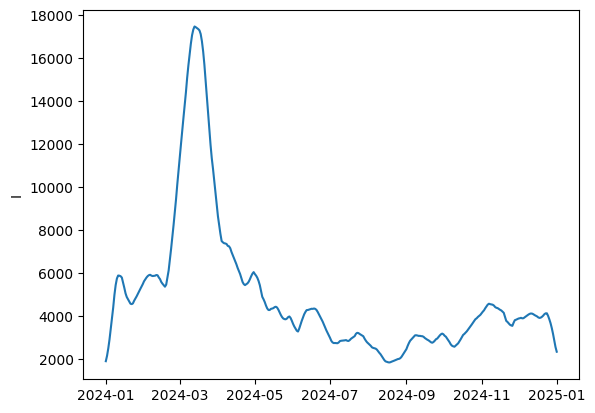

In [ ]:
smoothed_sir = sir.rolling(window=7).mean() 
sns.lineplot(data=smoothed_sir["I"]["2024-01-01":"2025-01-01"])
plt.show()